In [81]:
from pandas import DataFrame, read_excel, merge, concat, pivot_table, crosstab, melt
import sys
from matplotlib import pyplot as plt
from pandas import read_excel
import numpy as np
import seaborn as sb


In [82]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.unicode_minus"] = False

# 기술통계 연습문제 (1)

## 문제 1

다음 데이터는 조선시대 역대 왕의 수명을 조사한 데이터이다. 수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/D02/kings_life.xlsx

![q1](res/q1.png) index_col="월

In [83]:
df = read_excel("https://data.hossam.kr/D02/kings_life.xlsx",index_col='왕')
df

,수명
왕,
태조,73
정종,62
태종,45
세종,53
문종,38
단종,16
세조,51
예종,28
성종,37


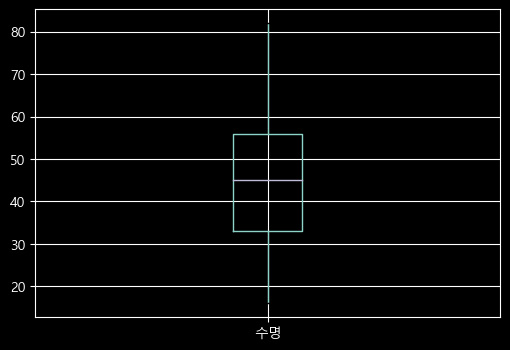

In [84]:
plt.figure()
plt.rcParams["figure.figsize"] = (6, 4)
plt.grid() 
df.boxplot()
plt.show()
plt.close()

In [85]:
df.describe()

,수명
count,27.000000
mean,46.037037
std,16.173296
min,16.000000
25%,33.000000
50%,45.000000
75%,56.000000
max,82.000000


In [86]:
평균수명 = df['수명'].mean()
장수왕 = df['수명'].max()
단명왕 = df['수명'].min()

In [87]:
df1 = df.copy()
df1['장수'] = np.where(df1['수명']>=평균수명,'장수','단명')
df1

,수명,장수
왕,,
태조,73,장수
정종,62,장수
태종,45,단명
세종,53,장수
문종,38,단명
단종,16,단명
세조,51,장수
예종,28,단명
성종,37,단명


In [88]:
print('조선시대 왕의 평균 수명은 {평균}세 였으며 가장 장수한 왕은 {장수}세, 단명한 왕은 {단명}세로 서거하였다.'.format(평균=round(평균수명),장수=장수왕,단명=단명왕))

조선시대 왕의 평균 수명은 46세 였으며 가장 장수한 왕은 82세, 단명한 왕은 16세로 서거하였다.


예시) 
총 27명의 왕에 대한 수명은 16~82 사이의 범위를 갖고 있으며 평균 수명은 46세이며, 중앙값 45, 1사분위수는 22, 3사분위 수는 56으로 나타났다. 상자그림을 통해 이상치는 없음을 확인할 수 있다. 

## 문제2

다음은 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가이다. 외국기업과 내국기업별로 기술통계량을 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/D02/stock.xlsx

![q2](res/q2.png)

In [89]:
금융사 = read_excel("https://data.hossam.kr/D02/stock.xlsx")
금융사

,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
9,F,147


In [90]:
내국기업 = 금융사.query('구분 == "K"')
외국기업 = 금융사.query('구분 == "F"')

In [91]:
# 데이터프레임을 병합해서 사용하기 (K와 F의 빈도수가 동일할 때 사용 가능 )
# DataFrame({'K': 내국기업['주가'],'F'=외국기업['주가']})

In [92]:
# catplot에서 col을 사용하여 그래프 

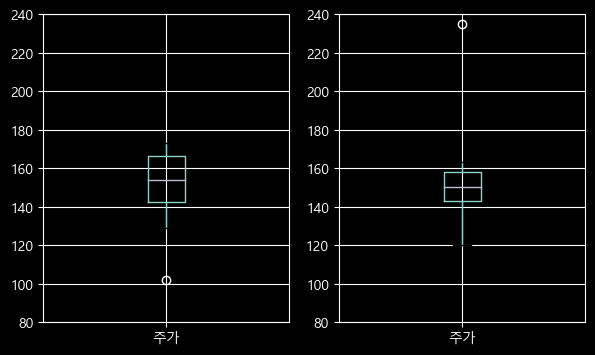

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,4))
내국기업.boxplot(['주가'],ax=ax1)
외국기업.boxplot(['주가'],ax=ax2)
ax1.set_ylim(80,240)
ax2.set_ylim(80,240)
plt.show()
plt.close()

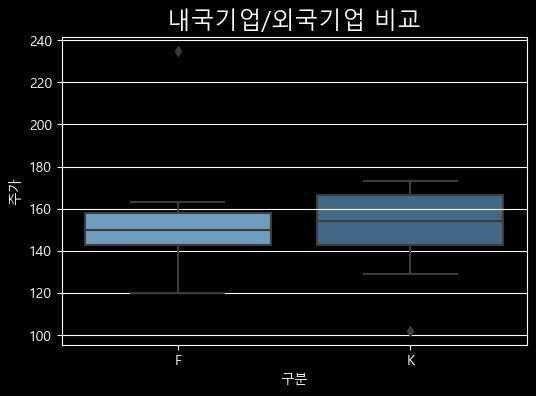

In [94]:
plt.figure()
plt.grid() 
plt.rcParams["figure.figsize"] = (4,2)
sb.boxplot(x='구분',y='주가',data=금융사,palette = "Blues_d")
plt.title('내국기업/외국기업 비교',fontsize=17,)
plt.show()
plt.close()

In [95]:
내국최소 = 내국기업['주가'].min()
내국평균 = 내국기업['주가'].mean()
외국최대 = 외국기업['주가'].max()
외국평균 = 외국기업['주가'].mean()
print('내국기업(K)는 주가가 평균 {내국평균} 이며 외국기업(K)는 주가가 평균 {외국평균}로 큰 차이는 없지만, 정책결정시 내국 가장 최소 주가 {내국최소}고, 외국의 가장 최대 주가 {외국최대}의 경험을 고려해야 한다. '.format(내국평균=round(내국평균),내국최소=내국최소,외국평균=round(외국평균),외국최대=외국최대))

내국기업(K)는 주가가 평균 151 이며 외국기업(K)는 주가가 평균 155로 큰 차이는 없지만, 정책결정시 내국 가장 최소 주가 102고, 외국의 가장 최대 주가 235의 경험을 고려해야 한다. 


주가의 변동 폭은 F보다 K가 더 크다. K는 폭락 지점이 보이고 F는 급등 지점이 보였다. 

## 문제3

포도농장에서 수집한 비료 종류에 따른 수확량 자료이다. 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/D02/grape.xlsx

![q3](res/q3.png)

In [96]:
포도농장 = read_excel("https://data.hossam.kr/D02/grape.xlsx")
포도농장

,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8
5,A,28.5
6,A,24.2
7,A,17.9
8,B,16.5
9,B,21.1


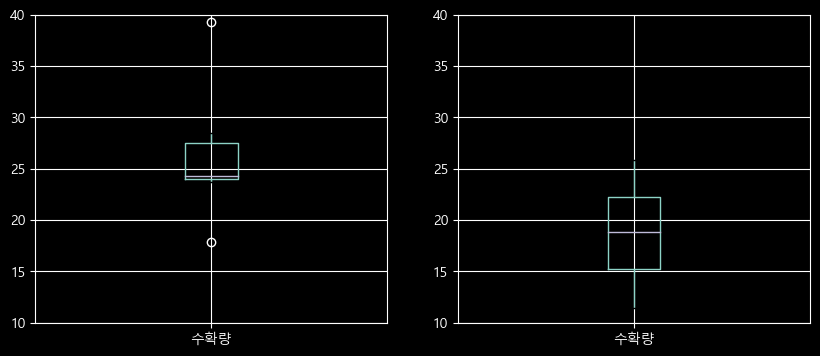

In [97]:
비료A = 포도농장.query('비료종류=="A"')
비료B = 포도농장.query('비료종류=="B"')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
비료A.boxplot(['수확량'],ax=ax1)
비료B.boxplot(['수확량'],ax=ax2)
ax1.set_ylim(10,40)
ax2.set_ylim(10,40)
plt.show()
plt.close()

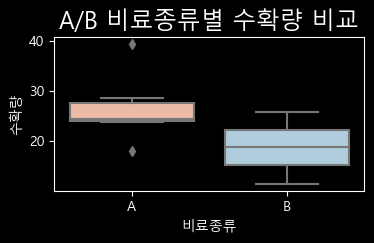

In [98]:
plt.figure()
sb.boxplot(x='비료종류',y='수확량',data=포도농장, palette = "RdBu")
plt.title('A/B 비료종류별 수확량 비교',fontsize=17)
plt.show()
plt.close()

In [99]:
A최소 = 비료A['수확량'].min()
A최대 = 비료A['수확량'].max()
A평균 = 비료A['수확량'].mean()
B평균 = 비료B['수확량'].mean()
빼기=round(A평균-B평균)
차이=(A최대-A최소)
print('비료A를 사용했을때 수확량은 평균 {A평균}고 비료B를 사용했을 때는 평균 수확량이 {B평균}로 {빼기}만큼 차이가 나고, 비료 A의 최소 수확량은 {A최소}고 최대 수확량은 {A최대}다. 데이터수가 많지 않아서 확신할 수는 없지만 자료를 토대로 봤을 때 비료 가격이 같다면 비료A를 사용하는 편이 수확량이 도움이 된다.'.format(A평균=round(A평균),A최소=A최소,B평균=round(B평균),A최대=A최대,빼기=빼기,차이=차이))

비료A를 사용했을때 수확량은 평균 26고 비료B를 사용했을 때는 평균 수확량이 19로 8만큼 차이가 나고, 비료 A의 최소 수확량은 17.9고 최대 수확량은 39.3다. 데이터수가 많지 않아서 확신할 수는 없지만 자료를 토대로 봤을 때 비료 가격이 같다면 비료A를 사용하는 편이 수확량이 도움이 된다.


평균값을 비교했을 때 A 비료를 사용하는 것이 B를 사용한 것보다 더 많은 수확량을 보인다. 
수확량 분포는 b 더 넓으므로 a를 사용하는 것이 더 안정적이다. 

## 문제4

다음은 통계학개론을 수강하는 두 학과(A, C)의 성적분포이다. 이 두 그룹을 비교하기 위한 기술통계량을 구하고 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

> https://data.hossam.kr/D02/analysis_grade.xlsx

![q4](res/q4.png)

In [100]:
통계학개론 = read_excel("https://data.hossam.kr/D02/analysis_grade.xlsx")
통계학개론

,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67
5,C,43
6,A,73
7,C,51
8,C,55
9,A,15


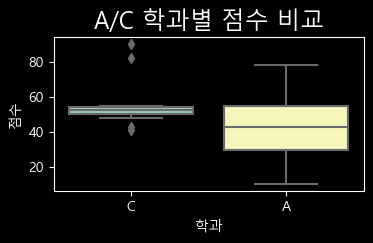

In [101]:
plt.figure()
sb.boxplot(x='학과',y='점수',data=통계학개론,palette='Set3')
plt.title('A/C 학과별 점수 비교',fontsize=17)
plt.show()
plt.close()

In [102]:
a1 = 통계학개론.query('학과 == "A"')
desc1 = a1.describe()
desc1.rename(columns={'점수':'A학과점수'},inplace=True)
desc1

,A학과점수
count,20.000000
mean,43.750000
std,20.229928
min,10.000000
25%,29.500000
50%,42.500000
75%,55.000000
max,78.000000


In [103]:
c1 = 통계학개론.query('학과 == "C"')
desc2 = c1.describe()
desc2.rename(columns={'점수':'C학과점수'},inplace=True)
desc2

,C학과점수
count,12.000000
mean,56.166667
std,14.689720
min,41.000000
25%,50.250000
50%,52.500000
75%,54.250000
max,90.000000


In [104]:
AC학과점수 = merge(desc1,desc2,left_index=True, right_index=True)
AC학과점수['비고'] = AC학과점수['A학과점수']/AC학과점수['C학과점수']
AC학과점수
# 학생 정원은 20명, c학과가 12명이다. 학생들의 점수는 a학과가 10~78점까지이고, B학과는 41점~90점이다. 평균 점수는 c학과가 더 높다. 
# 평균 점수는 C학과가 높고, 사분위수인 분포로 A학과보다 C학과의 학업 성취도가 더 높지만. 
# 평균이 높고 폭이 좁은걸로 봐서 문제의 변별력이 드러나지 않아서 재시험 각이다. 

,A학과점수,C학과점수,비고
count,20.000000,12.000000,1.666667
mean,43.750000,56.166667,0.778932
std,20.229928,14.689720,1.377149
min,10.000000,41.000000,0.243902
25%,29.500000,50.250000,0.587065
50%,42.500000,52.500000,0.809524
75%,55.000000,54.250000,1.013825
max,78.000000,90.000000,0.866667


In [105]:
df4 = read_excel("https://data.hossam.kr/D02/analysis_grade.xlsx")
df4

,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67
5,C,43
6,A,73
7,C,51
8,C,55
9,A,15


In [106]:
df4_1 = df4.query("학과=='A'")
df4_1.reset_index(drop=True, inplace=True)
df4_1.describe()

,점수
count,20.000000
mean,43.750000
std,20.229928
min,10.000000
25%,29.500000
50%,42.500000
75%,55.000000
max,78.000000


In [107]:
df4_2 = df4.query("학과=='C'")
df4_2.reset_index(drop=True, inplace=True)
df4_2.describe()

,점수
count,12.000000
mean,56.166667
std,14.689720
min,41.000000
25%,50.250000
50%,52.500000
75%,54.250000
max,90.000000


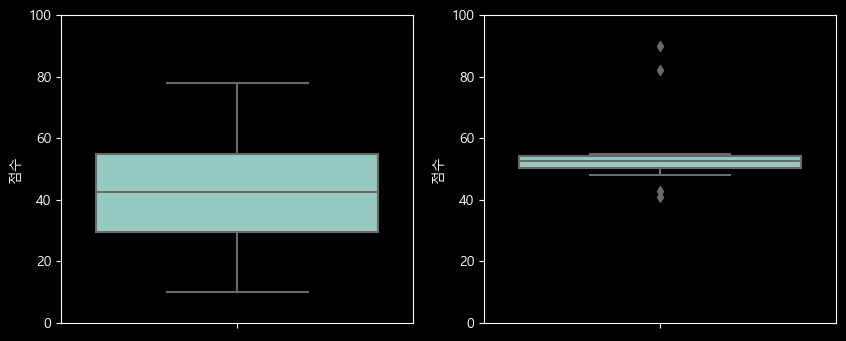

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sb.boxplot(data=df4_1, y="점수", ax=ax1)
sb.boxplot(data=df4_2, y="점수", ax=ax2)
ax1.set_ylim(0, 100)
ax2.set_ylim(0, 100)
plt.show()
plt.close()

알 수 있는 사실
학생 정원은 A학과가 20명, C학과가 12명이다.
학생들의 점수는 A학과의 경우 10~78점까지이고, ㅊ학과는 41점~90점까지 이다.
평균 점수는 C학과가 더 높다.
사분위 수의 분포로 A학과보다 C학과 학생들의 학업 성취도가 더 높다.

## 문제5

![q5](res/q5.png)

다음은 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적을 나타낸 표이다.

(1) 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.

(2) 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

(3) 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

(4) 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

https://data.hossam.kr/D02/stat_comp_grade.xlsx

In [109]:
df5 = read_excel("https://data.hossam.kr/D02/stat_comp_grade.xlsx")
df5

,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78
5,COMP,65,40
6,COMP,31,68
7,STAT,47,57
8,STAT,94,82
9,COMP,49,57


In [110]:
#(1) 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.
df1 = df5.copy()
df1['전공'] = np.where(df1['전공']=="STAT",'1','2')


In [111]:
# (2) 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.
# 전공1의 1등 / 전공2의 1등 <-> 꼴등
# 평균 / 중앙값 / 사분위수 
df2 = df5.groupby('전공')
desc = df2.describe()
desc.T

전공               COMP       STAT
중간고사 count   8.000000  12.000000
     mean   65.625000  64.833333
     std    18.423103  21.225342
     min    31.000000  34.000000
     25%    58.000000  47.000000
     50%    70.500000  67.500000
     75%    77.000000  80.500000
     max    87.000000  94.000000
기말고사 count   8.000000  12.000000
     mean   74.875000  76.166667
     std    18.795421  13.953386
     min    40.000000  53.000000
     25%    65.250000  67.500000
     50%    81.500000  78.500000
     75%    86.250000  85.250000
     max    96.000000  95.000000

전반적으로 중간고사 성적보다 기말고사 성적이 더 높다. 교수님 중간고사 채점하고 놀라서 쉽게 냈는듯..-> 아님 학생들이 몇명은 진도를 포기하고 존버한 몇명이 멱살잡고 끌어올림 

In [112]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

(2) 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

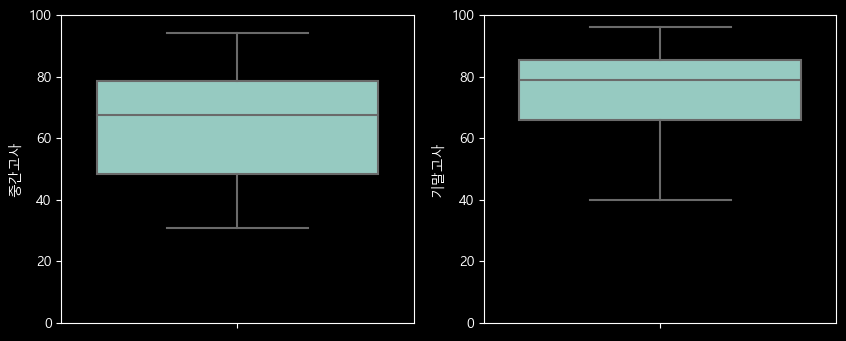

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sb.boxplot(data=df5, y="중간고사", ax=ax1)
sb.boxplot(data=df5, y="기말고사", ax=ax2)
ax1.set_ylim(0, 100)
ax2.set_ylim(0, 100)
plt.show()
plt.close()

In [114]:
df5.describe()

,중간고사,기말고사
count,20.000000,20.000000
mean,65.150000,75.650000
std,19.647619,15.597824
min,31.000000,40.000000
25%,48.500000,66.000000
50%,67.500000,79.000000
75%,78.500000,85.250000
max,94.000000,96.000000


In [115]:
# (3) 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라. 

In [119]:
hist, bins = np.histogram(df5['중간고사'], bins=5)
info = []
for i, v in enumerate(hist) :
    if i + 1 < len(hist) : # 마지막은 이하라고 표현해야 하므로 
        tpl = '%d 이상 %d 미만'
    else :
        tpl = '%d 이상 %d 이하'

    cls = tpl % (bins[i],bins[i+1])
    line = {'계급':cls,'도수':v}
    info.append(line)

hist_df = DataFrame(info)
hist_df.set_index('계급',inplace=True)

전체데이터수 = len(df)
hist_df['상대도수'] = hist_df['도수']/전체데이터수
hist_df

,도수,상대도수
계급,,
31 이상 43 미만,3,0.111111
43 이상 56 미만,4,0.148148
56 이상 68 미만,3,0.111111
68 이상 81 미만,6,0.222222
81 이상 94 이하,4,0.148148


In [120]:
hist, bins = np.histogram(df5['기말고사'], bins=5)
info = []
for i, v in enumerate(hist) :
    if i + 1 < len(hist) : # 마지막은 이하라고 표현해야 하므로 
        tpl = '%d 이상 %d 미만'
    else :
        tpl = '%d 이상 %d 이하'

    cls = tpl % (bins[i],bins[i+1])
    line = {'계급':cls,'도수':v}
    info.append(line)

hist_df = DataFrame(info)
hist_df.set_index('계급',inplace=True)

전체데이터수 = len(df)
hist_df['상대도수'] = hist_df['도수']/전체데이터수
hist_df

,도수,상대도수
계급,,
40 이상 51 미만,1,0.037037
51 이상 62 미만,4,0.148148
62 이상 73 미만,2,0.074074
73 이상 84 미만,5,0.185185
84 이상 96 이하,8,0.296296


In [122]:
hist, bins = np.histogram(df5['중간고사'], bins=5)

plt.figure()
df.hist(column='중간고사', bins=5, edgecolor='black', linewidth=1.2)
plt.xticks(bins, bins) 

plt.show()
plt.close()

KeyError: "None of [Index(['중간고사'], dtype='object')] are in the [columns]"

<Figure size 700x400 with 0 Axes>

In [123]:
hist, bins = np.histogram(df['기말고사'], bins=5)

plt.figure()
df.hist(column='기말고사', bins=5, edgecolor='black', linewidth=1.2)
plt.xticks(bins, bins) 

plt.show()
plt.close()

KeyError: '기말고사'

In [ ]:
# (4) 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

In [ ]:
plt.figure()
sb.boxplot(x='학과',y='점수',data=통계학개론)
plt.title('A/C 학과별 점수 비교',fontsize=17)
plt.show()
plt.close()

통계학은 전반적으로 학생들의 점수가 고르게 분포되어 있지만, 컴퓨터학과는 고득점자 그룹이 존재하는 것으로 보인다. 

(3) 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [124]:
hist1, bins1 = np.histogram(df5['중간고사'], bins=5)
bins1 = np.round(bins1, 1)
bins1

array([31. , 43.6, 56.2, 68.8, 81.4, 94. ])

In [125]:
hist2, bins2 = np.histogram(df5['기말고사'], bins=5)
bins2 = np.round(bins2, 1)
bins2

array([40. , 51.2, 62.4, 73.6, 84.8, 96. ])

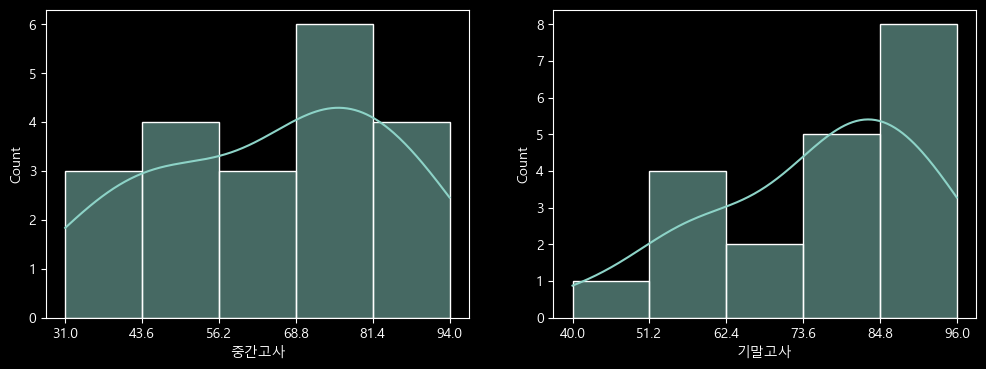

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sb.histplot(data=df5, x="중간고사", bins=5, ax=ax1, kde=True)
sb.histplot(data=df5, x="기말고사", bins=5, ax=ax2, kde=True)
ax1.set_xticks(bins1)
ax1.set_xticklabels(bins1)
ax2.set_xticks(bins2)
ax2.set_xticklabels(bins2)
plt.show()
plt.close()

(4) 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

In [134]:
STAT_df = df5.query("전공==1")
STAT_df

,전공,중간고사,기말고사


In [133]:
COMP_df = df5.query("전공==2")
COMP_df

,전공,중간고사,기말고사


In [130]:
stat_hist1, stat_bins1 = np.histogram(STAT_df['중간고사'], bins=5)
stat_bins1 = np.round(stat_bins1, 1)
stat_bins1

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [129]:
stat_hist2, stat_bins2 = np.histogram(STAT_df['기말고사'], bins=5)
stat_bins2 = np.round(stat_bins2, 1)
stat_bins2

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [132]:
compu_hist1, compu_bins1 = np.histogram(STAT_df['중간고사'], bins=5)
compu_bins1 = np.round(compu_bins1, 1)
compu_bins1

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [131]:
compu_hist2, compu_bins2 = np.histogram(STAT_df['기말고사'], bins=5)
compu_bins2 = np.round(compu_bins2, 1)
compu_bins2

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

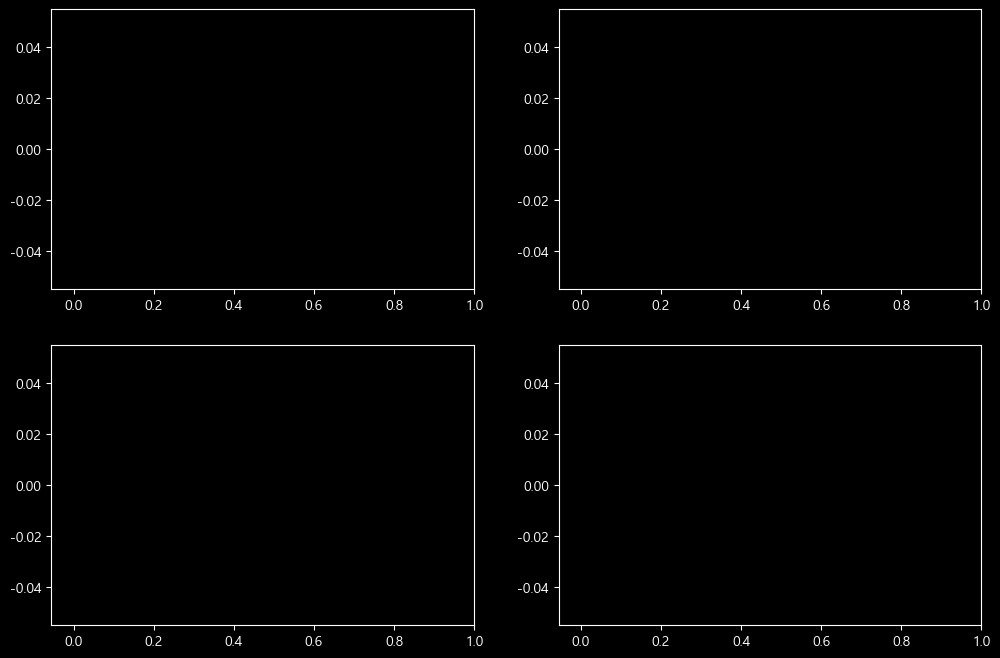

In [135]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

sb.histplot(data=STAT_df, x="중간고사", bins=5, ax=ax1, kde=True)
ax1.set_xticks(stat_bins1)
ax1.set_xticklabels(stat_bins1)

sb.histplot(data=STAT_df, x="기말고사", bins=5, ax=ax2, kde=True)
ax2.set_xticks(stat_bins2)
ax2.set_xticklabels(stat_bins2)

sb.histplot(data=COMP_df, x="중간고사", bins=5, ax=ax3, kde=True)
ax3.set_xticks(compu_bins1)
ax3.set_xticklabels(compu_bins1)

sb.histplot(data=COMP_df, x="기말고사", bins=5, ax=ax4, kde=True)
ax4.set_xticks(compu_bins2)
ax4.set_xticklabels(compu_bins2)

plt.show()
plt.close()